In [1]:
import sys
sys.path.append('../../')

from chempath import Chempath
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
from string import Template
import plotly.express as px


# Running the photochem model

First we need to instal the photochem model. Follow the installation instruction to install the model: https://github.com/Nicholaswogan/photochem. You can see the [photochem tutorial](https://github.com/Nicholaswogan/photochem/blob/main/examples/Tutorial.ipynb) to understand how to use this model.

The script `run_photochem_model.py` runs the photochem model using a modern Earth template and decreasing the $O_2$ flux from 3.3e11 to 2.5e11 molecules/cm^2/s (see script to inquire how the model was run). The output from this model run in saved to a folder named `photochem_output/`. This script also creates a csv file with the number densities of some species in this model run. For the purpose of saving space we only include this csv file in this repository. If you want to see full photochem output, run the script.

The script `photochem_output_to_chempath.py` converts the photochem output to files readable by chempath (see the script for details about this process). These files are saved to the folder `chempath_input/`. For this example, we only include the chempath input files at the model time=4.88my. 

The script `get_pathways.py` gets the pathways and their contributions at all the altitudes of the photochem model output. We ran this script in parallel in a computer with many cores. It took around 10 hours of computing time to run. The pathways contributions are saved as csv files in the `pathways/` folder. For this example we include csv files with the pathways contributions to O3 production and destruction at 40 model times in our photochem model run. These files are in the pathways/ folder

Let's plot the photochem model output:

In [2]:
me_number_densities = pd.read_csv('photochem_output/number_densities.csv',
    compression='gzip')

me_number_densities

,Unnamed: 0,O2,O3,CH4,CO,H2,OH,HO2,O,NO,NO2,time,alt
0,0,4.659294e+18,2.341689e+11,3.357836e+13,7.459652e+11,3.037501e+13,369425.966161,1.531933e+08,6.591844e+02,1497.124643,7.501431e+05,3.714626e+12,0.5
1,1,4.216691e+18,2.351865e+11,3.034845e+13,6.740504e+11,2.749325e+13,424686.173167,1.500453e+08,7.895709e+02,2056.579534,8.776937e+05,3.714626e+12,1.5
2,2,3.818816e+18,2.432760e+11,2.745138e+13,6.111466e+11,2.490586e+13,469728.677237,1.435220e+08,9.633399e+02,3172.632970,1.139067e+06,3.714626e+12,2.5
3,3,3.450093e+18,2.560837e+11,2.477308e+13,5.543862e+11,2.251015e+13,495068.809046,1.358819e+08,1.198131e+03,5224.391900,1.543538e+06,3.714626e+12,3.5
4,4,3.109096e+18,2.718438e+11,2.230141e+13,5.029739e+11,2.029568e+13,521329.464922,1.299180e+08,1.505335e+03,8897.588573,2.107956e+06,3.714626e+12,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17095,95,3.895577e+12,6.988273e+06,2.807699e+05,2.421204e+08,1.643564e+08,42190.360714,2.571156e+02,6.413272e+11,62533.596376,2.391408e-02,1.638053e+14,95.5
17096,96,3.238019e+12,5.470277e+06,2.350211e+05,2.332068e+08,1.400704e+08,28742.329052,1.598530e+02,6.559769e+11,46879.761939,1.528427e-02,1.638053e+14,96.5
17097,97,2.687658e+12,4.210835e+06,1.969079e+05,2.205593e+08,1.194459e+08,19581.159389,1.004071e+02,6.582116e+11,35520.339929,9.874948e-03,1.638053e+14,97.5
17098,98,2.230195e+12,3.180684e+06,1.656323e+05,2.036816e+08,1.019002e+08,13405.520967,6.392348e+01,6.459094e+11,28029.029666,6.645114e-03,1.638053e+14,98.5


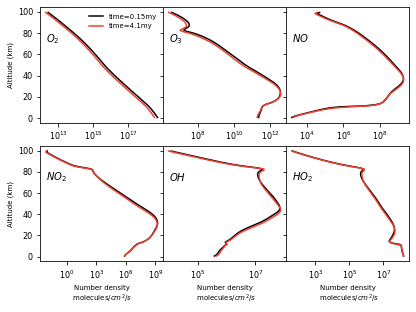

In [16]:
# read number density file
me_number_densities = pd.read_csv('photochem_output/number_densities.csv',
    compression='gzip')

my =60*60*24*365*1e6

# size of figure to fit in a4 page size
a4_x, a4_y = (8.27, 11.69)

# filter data for specific times
times = me_number_densities.time.unique()
me_number_densities_t1 = me_number_densities[
    me_number_densities.time == times[1]]
me_number_densities_t2 = me_number_densities[me_number_densities.time == times[-5]]

# make plots
fig, axs = plt.subplots(2,3, figsize=(0.8*a4_x, 0.4*a4_y),
    sharey=True)

species = ['O2', 'O3', 'NO', 'NO2', 'OH', 'HO2']
labels = [r'$O_2$', r'$O_3$', r'$NO$', r'$NO_2$', r'$OH$', r'$HO_2$']

axs = axs.flatten()
time1 = round(times[1]/my,2)
time2 = round(times[-5]/my, 2)
for i, sp in enumerate(species):
    plt.sca(axs[i])
    plt.plot(me_number_densities_t1[sp], me_number_densities_t1['alt'], color='k',
        label=f'time={time1}my')
    plt.plot(me_number_densities_t2[sp], me_number_densities_t2['alt'], 
        color='#f23d2e',
        label=f'time={time2}my')
    axs[i].text(0.05, 0.7, labels[i], transform=axs[i].transAxes, size=10)
    plt.xscale('log')
    if i==0:
        plt.legend(frameon=0, fontsize=7)
    if i in [0,3]:
        plt.ylabel('Altitude (km)', fontsize=7)
    if i in [3,4,5]:
        plt.xlabel('Number density\n molecules$/cm^2/s$', fontsize=7)

plt.subplots_adjust(wspace=0, hspace=0.2)
fig.savefig('me_num_density_profiles.pdf', bbox_inches="tight")

We can see that O2 and O3 decrease at all altitudes as a consequence of the O2 input flux decrease. Now let's explore the pathways for this model run.

In [4]:
# read pathway files
loss_pathways = pd.read_csv('pathways/loss_pathways_profiles_O3.csv',
    compression='gzip')
prod_pathways = pd.read_csv('pathways/prod_pathways_profiles_O3.csv',
    compression='gzip')

Let's take a look at the data:

In [5]:
prod_pathways.head()

,Unnamed: 0,pathway_id,pathway,contribution,rate,total_prod,dconc,species,time,alt
0,0,1*1382,O3_transport -> O3\nNet:O3_transport -> O3,0.976160,82491.084757,7.529127e+16,-1.427602e+09,O3,1.329819e+13,0.5
1,1,"2*54,2*398,1*401,2*408,2*490,2*495,2*632,1*641...",2(CH4+OH -> CH3+H2O)\n2(CH3O+O2 -> H2CO+HO2)\n...,0.008873,374.919063,6.843923e+14,-1.427602e+09,O3,1.329819e+13,0.5
2,2,"2*54,1*338,2*398,1*401,2*408,2*490,2*495,2*632...",2(CH4+OH -> CH3+H2O)\nO1D+H2O -> OH+OH\n2(CH3O...,0.006620,559.446808,5.106183e+14,-1.427602e+09,O3,1.329819e+13,0.5
3,3,del,deleted_pathways,0.002160,182.508156,1.665789e+14,-1.427602e+09,O3,1.329819e+13,0.5
4,4,"2*54,1*338,2*385,2*391,2*398,3*401,2*408,2*490...",2(CH4+OH -> CH3+H2O)\nO1D+H2O -> OH+OH\n2(H+O2...,0.001646,139.130387,1.269871e+14,-1.427602e+09,O3,1.329819e+13,0.5


We have information about the contribution of pathways to O3 production adn destruction at different altitudes and times in our photochem model run. Let's plot the contributions of the most important pathways:

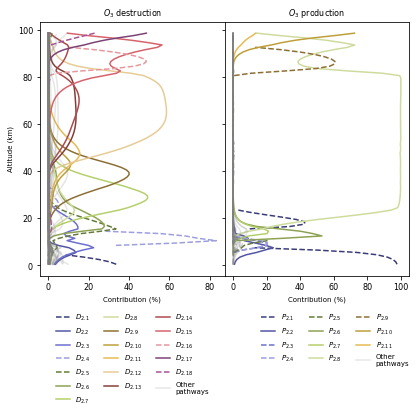

In [6]:

# do not consider last layer
loss_pathways = loss_pathways[loss_pathways.alt != 99.5]
prod_pathways = prod_pathways[prod_pathways.alt != 99.5]

# size of figure to fit in a4 page size
a4_x, a4_y = (8.27, 11.69)

# set ticks size
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8)

years = 60*60*24*365
my = years * 1e6

def get_important_pathways(time_idx, species, minimum_contribution=0.2,
        type='production'):
    '''Gets pathways that have a contribution higher than minimum_contribution'''
    if type == 'destruction':
        # filter pathways for this species
        pathways_data = loss_pathways[loss_pathways.species == species]
        # get unique model times
        times = pathways_data.time.unique()
        # get pathways at this time idx
        pathways_data_t = pathways_data[pathways_data.time == times[time_idx]]
    elif type == 'production':
        # filter pathways for this species
        pathways_data = prod_pathways[prod_pathways.species == species]
        # get unique model times
        times = pathways_data.time.unique()
        # get pathways at this time idx
        pathways_data_t = pathways_data[pathways_data.time == times[time_idx]]

    # get pathways with contribution higher than minimum
    important_pathways = pathways_data_t[
        pathways_data_t.contribution>minimum_contribution].pathway.unique()
    # ignore deleted pathways
    important_pathways = [x for x in important_pathways if x != 'deleted_pathways']
    return important_pathways

def get_colors_and_labels(time_idx, species, minimum_contribution,
        id_number='2', type='production'):
    '''Gets a color and a label for each important pathway, and returns a dict
    of colors and labels'''
    # get important pathways
    important_pathways = get_important_pathways(time_idx, species, 
            minimum_contribution=minimum_contribution, type=type)
        
    # make a color dict
    colors = sns.color_palette('tab20b', len(important_pathways))
    colors_dict = {k:v for k,v in zip(important_pathways, colors)}
    
    # make a label dict
    if type == 'destruction':
        labels = [r'$D_{2.1}$'] * len(important_pathways)
    elif type == 'production':
        labels = [r'$P_{2.1}$'] * len(important_pathways)
    numbers = [f'2.{x+1}' for x in range(len(important_pathways))]
    labels = [labels[i].replace('2.1', numbers[i]) for i in
        range(len(important_pathways))]
    labels = [x.replace('2.', f'{id_number}.') for x in labels]
    labels_dict = {k:v for k,v in zip(important_pathways, labels)}
    return colors_dict, labels_dict

def plot_contribution_profiles(time_idx, species, minimum_contribution,
        type='destruction', id_number='2'):
    '''Plots contribution profiles'''
    if type == 'destruction':
        # filter pathways for this species
        pathways_data = loss_pathways[loss_pathways.species == species]
        # get unique model times
        times = pathways_data.time.unique()
        # get pathways at this time idx
        pathways_data_t = pathways_data[pathways_data.time == times[time_idx]]
    elif type == 'production':
        # filter pathways for this species
        pathways_data = prod_pathways[prod_pathways.species == species]
        # get unique model times
        times = pathways_data.time.unique()
        # get pathways at this time idx
        pathways_data_t = pathways_data[pathways_data.time == times[time_idx]]
    # get important pathways
    important_pathways = get_important_pathways(time_idx, species, 
            minimum_contribution=minimum_contribution, type=type)
    
    # get unimportant pathways
    unimportant_pathways = pathways_data_t.pathway.unique()
    unimportant_pathways = [x for x in unimportant_pathways if x 
        not in important_pathways]
    
    # get colors and labels
    colors_dict, labels_dict = get_colors_and_labels(time_idx, species, 
        minimum_contribution, id_number=id_number, type=type)

    # plot important pathways
    for i, pathway in enumerate(important_pathways):
        # filter data for this pathway
        pathway_df = pathways_data_t[pathways_data_t.pathway == pathway]
        # fill altutudes without data with nans
        alts = pathway_df.alt.unique()
        missing_alts = [x for x in np.arange(0.5, 100, 1) if x not in alts]
        nan_df = pd.DataFrame({k:np.ones(len(missing_alts))*np.nan for k 
            in pathway_df.columns})
        nan_df['alt'] = missing_alts
        pathway_df = pd.concat([pathway_df, nan_df]).sort_values('alt')
        # plot pathways with transport reactions with dashed lines
        ls = 'dashed' if 'transport' in pathway else 'solid'
        plt.plot(100*pathway_df.contribution, pathway_df.alt,
            color=colors_dict[pathway], label=labels_dict[pathway], ls=ls)
        
    # plot unimportant pathways
    # filter data for this pathway
    for i, pathway in enumerate(unimportant_pathways):
        pathway_df = pathways_data_t[pathways_data_t.pathway == pathway]
        # fill altutudes without data with nans
        alts = pathway_df.alt.unique()
        missing_alts = [x for x in np.arange(0.5, 100, 1) if x not in alts]
        nan_df = pd.DataFrame({k:np.ones(len(missing_alts))*np.nan for k 
            in pathway_df.columns})
        nan_df['alt'] = missing_alts
        pathway_df = pd.concat([pathway_df, nan_df]).sort_values('alt')
        # plot pathways with transport reactions with dashed lines
        ls = 'dashed' if 'transport' in pathway else 'solid'
        if i==0:
            plt.plot(100*pathway_df.contribution, pathway_df.alt, color='gray', 
                alpha=0.2, label='Other\npathways')
        else:
            plt.plot(100*pathway_df.contribution, pathway_df.alt, color='gray', 
                alpha=0.2, ls=ls)
 

time_idx = -1
fig, axs = plt.subplots(1,2, figsize=(a4_x*0.8, a4_y*0.4), sharey=True)

plt.sca(axs[0])
plot_contribution_profiles(time_idx, 'O3', type='destruction', minimum_contribution=0.1)
plt.xlabel('Contribution (%)', fontsize=7)
plt.legend(frameon=0, fontsize=7, ncol=3, loc='upper center',
    bbox_to_anchor=(0.5, -0.12))
plt.subplots_adjust(wspace=0, hspace=0)
plt.ylabel('Altitude (km)', fontsize=7)
plt.title(r'$O_3$ destruction', fontsize=8)

plt.sca(axs[1])
plot_contribution_profiles(time_idx, 'O3', type='production', minimum_contribution=0.1)
plt.subplots_adjust(wspace=0, hspace=0)
plt.title(r'$O_3$ production', fontsize=8)
plt.xlabel('Contribution (%)', fontsize=7)
plt.legend(frameon=0, fontsize=7, ncol=3, loc='upper center',
    bbox_to_anchor=(0.6, -0.12))

fig.savefig('O3_contribution_profiles.pdf', bbox_inches="tight")


Now let's make a table to show these pathways:

In [27]:
def to_latex(pathway):
    '''Converts a pathway string to a latex format'''
    reactions = pathway.split('\n')
    reactions = [x.replace('+', ' + ').replace('_transport', '_{\\text{trpt}}' ) for x in reactions]
    reactions = ['\\ce{' + x + '}\\\\' for x in reactions]
    reactions[-1] = reactions[-1].replace('Net:', '\\text{Net:} ').\
        replace('+ hv', '').replace('+ M', '')[:-2]
    pathway = '\n\t'.join(reactions)
    return pathway

def get_latex_contribution_table(data):
    '''gets a latex table string'''
    latex_table = Template('''
        \\begin{longtable}{ |c|c|c|c|c| }
        \hline
        ID & Pathway & 
        \\begin{tabular}{@{}c@{}} Contrib \\\\ \\% \end{tabular} &
        \\begin{tabular}{@{}c@{}} Rate \\\\ \\frac{molec}{cm^2s} \end{tabular} &
        \\begin{tabular}{@{}c@{}} Alt \\\\ km \end{tabular} \\\\
        \hline
        ${rows}
        \end{longtable}
        '''
    )

    toestr  = lambda x: '{:.3e}'.format(x)
    to_str = lambda x: str(round(x, 3))
    rows = ''
    for i in range(data.shape[0]):
        row = data.iloc[i]
        id_str = row.id
        pathway = '\\begin{tabular}{@{}c@{}}' + to_latex(row.pathway) + '\end{tabular}'
        contrib = to_str(row.contribution)
        rate = toestr(row.rate)
        row =  f'{id_str} & {pathway} & {contrib} & {rate} & {row.alt}'
        rows += '\t' + row + '\\\\' + '\n \t \\hline \n'
    return latex_table.substitute(rows=rows)

def get_contributions_by_alt(pathways, species, time_idx, ids):
    '''Gets the data for the altitude at wich pathways have the highest
    contrbution'''
    # concat production adn destruction data
    prod_pathways['type'] = 'production'
    loss_pathways['type'] = 'destruction'
    contrib_dfs = pd.concat([prod_pathways, loss_pathways])
    # filter data for this species
    data_sp = contrib_dfs[contrib_dfs.species == species]
    # filter data for this time_idx
    times = data_sp.time.unique()
    data_sp_t = data_sp[data_sp.time == times[time_idx]]
    # filter data for these pathways
    data_pathways = data_sp_t[data_sp_t.pathway.isin(pathways)]
    data_pathways = data_pathways[['pathway', 'alt', 'contribution', 'rate', 
        'type']]
    
    data = []
    # for each pathway..
    for pathway in pathways:
        # filer data for this pathway and get data for highest contribution
        data_p = data_pathways[data_pathways.pathway == pathway].\
            sort_values('contribution').iloc[-1]
        data.append(data_p.to_list())
    data = pd.DataFrame(data, columns=data_pathways.columns)
    data['id'] = data.pathway.map(ids)
    get_id_num = lambda x: float(x[6:-2])
    data['id_num'] = data.id.apply(get_id_num)
    return data.sort_values(['type', 'id_num'])

def get_pathways_df(species, time_idx, id_number='2', minimum_contribution=0.1):
    '''Gets a dataframe with the most important pathways for the production and
    destruction of a specie at a given time_idx, at the altitude of highest
    contribution'''
    # get destruction pathways and labels
    colors_dict, labels_dict = get_colors_and_labels(time_idx, species, 
        minimum_contribution=minimum_contribution, id_number=id_number, 
        type='destruction')
    destr_pathways, destr_ids = list(colors_dict.keys()), list(labels_dict.values())
    # get production pathways and labels
    colors_dict, labels_dict = get_colors_and_labels(time_idx, species, 
        minimum_contribution=minimum_contribution, id_number=id_number, 
        type='production')
    prod_pathways, prod_ids = list(colors_dict.keys()), list(labels_dict.values())
    # concat productio and destruction
    pathways = destr_pathways + prod_pathways
    ids = destr_ids + prod_ids
    ids = {k:v for k,v in zip(pathways, ids)}
    data = get_contributions_by_alt(pathways, species, time_idx, ids)
    data['contribution'] == data['contribution'] * 100
    return data

# print most important pathways
pathways_data = get_pathways_df('O3', -1, id_number='2')
pathways_data['contribution'] = pathways_data['contribution'] * 100

print(pathways_data.to_markdown())

|    | pathway                                                        |   alt |   contribution |      rate | type        | id         |   id_num |
|---:|:---------------------------------------------------------------|------:|---------------:|----------:|:------------|:-----------|---------:|
|  0 | 2(CH4+OH -> CH3+H2O)                                           |   0.5 |        33.6082 |  29251.1  | destruction | $D_{2.1}$  |        1 |
|    | O1D+H2O -> OH+OH                                               |       |                |           |             |            |          |
|    | 2(CH3+O2+M -> CH3O2+M)                                         |       |                |           |             |            |          |
|    | O3+hv -> O1D+O2                                                |       |                |           |             |            |          |
|    | 2(CH3O2 -> CH3O2_transport)                                    |       |                |           |          

We can also make a latex table:

In [28]:
print(get_latex_contribution_table(get_pathways_df('O3', -2, id_number='2')))


        \begin{longtable}{ |c|c|c|c|c| }
        \hline
        ID & Pathway & 
        \begin{tabular}{@{}c@{}} Contrib \\ \% \end{tabular} &
        \begin{tabular}{@{}c@{}} Rate \\ \frac{molec}{cm^2s} \end{tabular} &
        \begin{tabular}{@{}c@{}} Alt \\ km \end{tabular} \\
        \hline
        	$D_{2.1}$ & \begin{tabular}{@{}c@{}}\ce{2(CH4 + OH -> CH3 + H2O)}\\
	\ce{O1D + H2O -> OH + OH}\\
	\ce{2(CH3 + O2 + M -> CH3O2 + M)}\\
	\ce{O3 + hv -> O1D + O2}\\
	\ce{2(CH3O2 -> CH3O2_{\text{trpt}})}\\
	\ce{\text{Net:} O2  +  2CH4  +  O3 -> H2O  +  2CH3O2_{\text{trpt}}}\end{tabular} & 0.338 & 2.925e+04 & 0.5\\
 	 \hline 
	$D_{2.2}$ & \begin{tabular}{@{}c@{}}\ce{2(CH4 + OH -> CH3 + H2O)}\\
	\ce{2(CH3O + O2 -> H2CO + HO2)}\\
	\ce{HO2 + HO2 -> H2O2 + O2}\\
	\ce{2(CH3 + O2 + M -> CH3O2 + M)}\\
	\ce{2(CH3O2 + O -> CH3O + O2)}\\
	\ce{2(H2CO + hv -> CO + H2)}\\
	\ce{2(O3 + hv -> O + O2)}\\
	\ce{H2O2 + hv -> OH + OH}\\
	\ce{\text{Net:} 2CH4  +  2O3 -> 2H2  +  2H2O  +  O2  +  2CO}\end{tabular} &

Now let's plot the contribution of pathways over time at a given altitude:

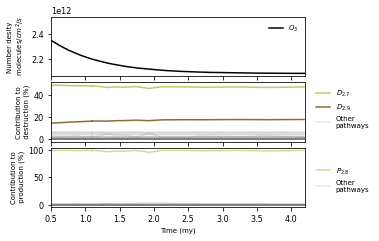

In [20]:
def plot_pathways_contribs_over_time(species, alt, id_number='2',
    type='destruction', minimum_contribution=0.2):
    if type == 'destruction':
        # filter pathways for this species
        pathways_data = loss_pathways[loss_pathways.species == species]
        # get pathways at this altitude
        pathways_data_alt = pathways_data[pathways_data.alt == alt]
    elif type == 'production':
        # filter pathways for this species
        pathways_data = prod_pathways[prod_pathways.species == species]
        # get pathways at this altitude
        pathways_data_alt = pathways_data[pathways_data.alt == alt]
    # get important pathways
    important_pathways = get_important_pathways(time_idx, species, 
            minimum_contribution=minimum_contribution, type=type)
    
    # get unimportant pathways
    unimportant_pathways = pathways_data_alt.pathway.unique()
    unimportant_pathways = [x for x in unimportant_pathways if x 
        not in important_pathways]
    
    # get colors and labels
    colors_dict, labels_dict = get_colors_and_labels(time_idx, species, 
        minimum_contribution, id_number=id_number, type=type)

    for i, pathway in enumerate(important_pathways):
        # get infor for this pathway
        pathway_df = pathways_data_alt[pathways_data_alt.pathway == pathway]
        if pathway_df.shape[0] > 0 and pathway_df.iloc[0].contribution >= minimum_contribution:
            plt.plot(pathway_df.time/my, np.abs(100*pathway_df.contribution),
                    label=labels_dict[pathway], color=colors_dict[pathway])
        else:
            plt.plot(pathway_df.time/my, np.abs(100*pathway_df.contribution),
                color='gray', alpha=0.2)
            
    for i, pathway in enumerate(unimportant_pathways):
        # get infor for this pathway
        pathway_df = pathways_data_alt[pathways_data_alt.pathway == pathway]
        if i==0:
            plt.plot(pathway_df.time/my, 100*pathway_df.contribution, color='gray', 
                alpha=0.2, label='Other\npathways')
        else:
            plt.plot(pathway_df.time/my, 100*pathway_df.contribution, color='gray', 
                alpha=0.2)
    

alt = 30.5
fig, axs = plt.subplots(3,1, figsize=(a4_x*0.55, a4_y*0.3),
    sharex=True)
me_number_densities_alt = me_number_densities[me_number_densities.alt==alt]
times = me_number_densities_alt.time.unique()
me_number_densities_alt = me_number_densities_alt[me_number_densities_alt.time <= times[-1]]

plt.sca(axs[0])
plt.plot(me_number_densities_alt.time/my, me_number_densities_alt['O3'], color='k',
    label=r'$O_3$')
# plt.yscale('log')
plt.legend(frameon=0, fontsize=7)
plt.ylabel('Number desity\n molecules$/cm^2/s$', fontsize=7)

plt.sca(axs[1])
plot_pathways_contribs_over_time('O3',alt, id_number='2', type='destruction',
    minimum_contribution=0.1)
plt.legend(frameon=0, fontsize=7, ncol=1, loc='upper center',
    bbox_to_anchor=(1.15, 1))
plt.ylabel('Contribution to\n destruction (%)', fontsize=7)
# plt.yscale('log')


plt.sca(axs[2])
plot_pathways_contribs_over_time('O3',alt, id_number='2', type='production',
    minimum_contribution=0.1)
plt.legend(frameon=0, fontsize=7, ncol=1, loc='upper center',
    bbox_to_anchor=(1.15, 0.8))
plt.ylabel('Contribution to\n production (%)', fontsize=7)
# plt.yscale('log')

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.xlim([0.5,4.2])
plt.xlabel('Time (my)', fontsize=7)
fig.savefig('contributions_30km.pdf', bbox_inches="tight")

In [12]:

del_pathways_loss = loss_pathways[loss_pathways.pathway_id == 'del']
del_pathways_prod = prod_pathways[prod_pathways.pathway_id == 'del']

fig = px.line(del_pathways_loss, x=del_pathways_loss['contribution']*100, y='alt',
        animation_frame=del_pathways_loss['time']/my,
        labels={'x':'Contribution (%)', 'alt':'Altitude (km)'},
        title='Contribution of deleted pathways to O3 destruction')
fig.show()

fig = px.line(del_pathways_prod, x=del_pathways_prod['contribution']*100, y='alt',
        animation_frame=del_pathways_prod['time']/my,
        labels={'x':'Contribution (%)', 'alt':'Altitude (km)'},
        title='Contribution of deleted pathways to O3 production'
        )
fig.show()

In [14]:
def get_number_of_pathways_per_alt(species, type='destruction'):
    '''Gets number of pathways per altutude'''
    if type == 'destruction':
        data_species = loss_pathways[loss_pathways.species == species]
    elif type == 'production':
        data_species = prod_pathways[prod_pathways.species == species]
    
    pathways_per = data_species[['pathway', 'time', 'alt']].\
        groupby(['time', 'alt']).count().reset_index()
    return pathways_per



num_pathways_loss = get_number_of_pathways_per_alt('O3', type='destruction')
num_pathways_prod = get_number_of_pathways_per_alt('O3', type='production')

fig = px.line(num_pathways_loss, x='pathway', y='alt',
        animation_frame='time',
        labels={'x':'Number of pathways', 'alt':'Altitude (km)'},
        title='Number of destruction O3 pathways per altitude')
fig.show()

fig = px.line(num_pathways_prod, x='pathway', y='alt',
        animation_frame='time',
        labels={'x':'Number of pathways', 'alt':'Altitude (km)'},
        title='Number of production O3 pathways per altitude')
fig.show()